In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
tips=sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


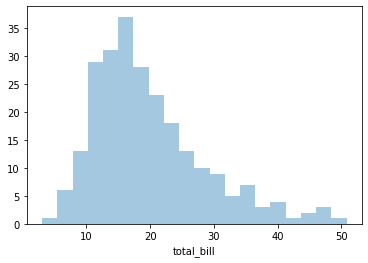

In [5]:
# Distribution plots
sns.distplot(tips['total_bill'],kde=False,bins=20)

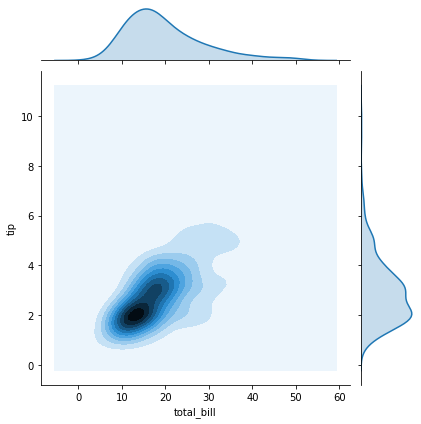

In [6]:
# Joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') # Default kind is scatter
# Regression (reg), hex, kde

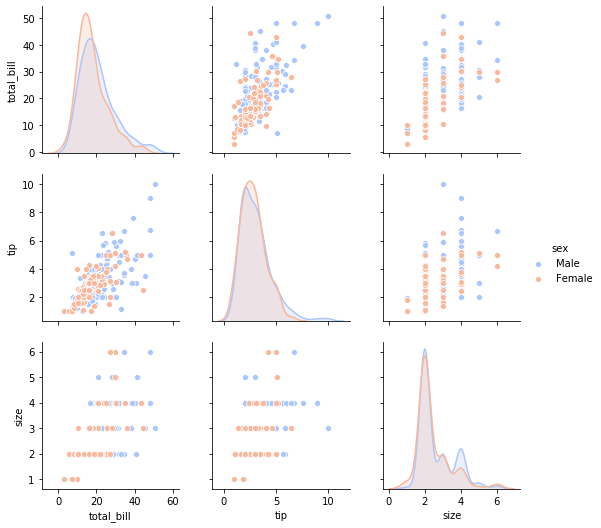

In [7]:
sns.pairplot(tips,hue='sex',palette='coolwarm') # Joint plot for all, hue= category

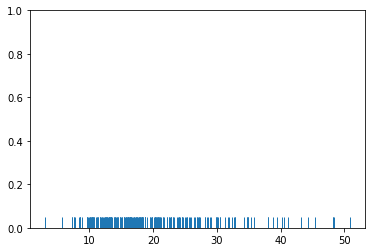

In [8]:
sns.rugplot(tips['total_bill']) # Dash for every single point

In [9]:
# kde plot (kernal density estimation) based on rugplot
# Summation of normal distribution (normal distribution at each point)

(0, 1)

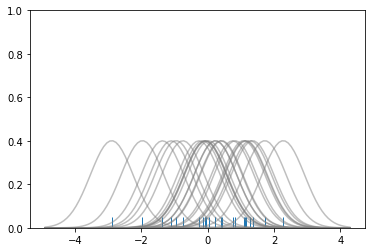

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

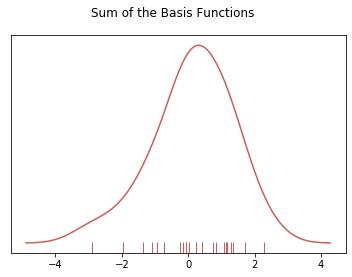

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

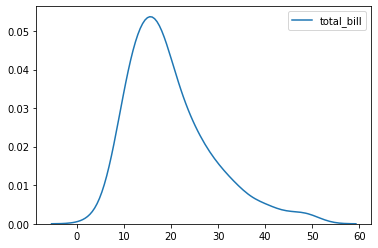

In [12]:
sns.kdeplot(tips['total_bill'])

In [13]:
# Categorical plots
import numpy as np

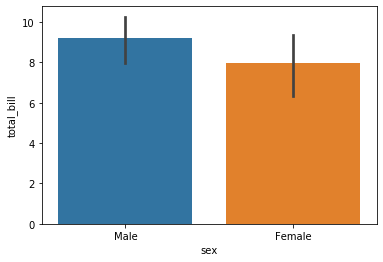

In [14]:
# bar plot
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # Shift tab for help

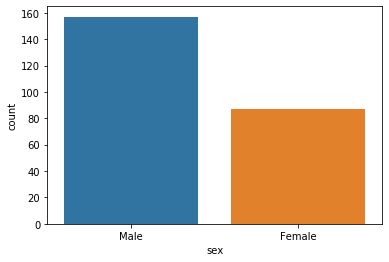

In [15]:
sns.countplot(x='sex',data=tips) # y axis is counting

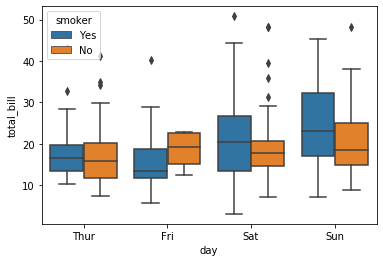

In [16]:
# Box and whisker plot
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

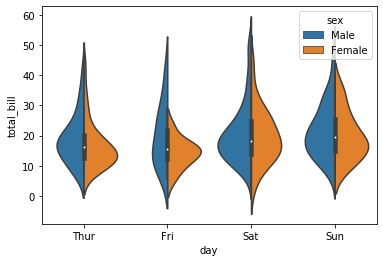

In [17]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

d:\Users\MM15493\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


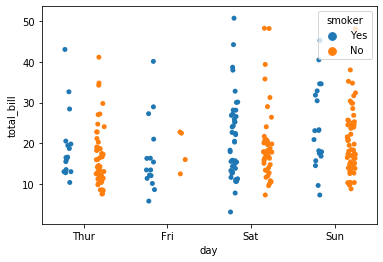

In [18]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='smoker',split=True)

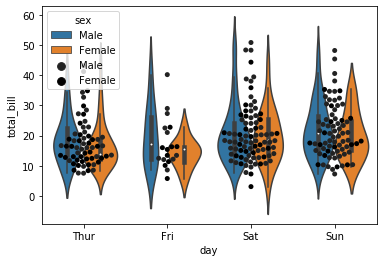

In [19]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',color='black')

d:\Users\MM15493\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


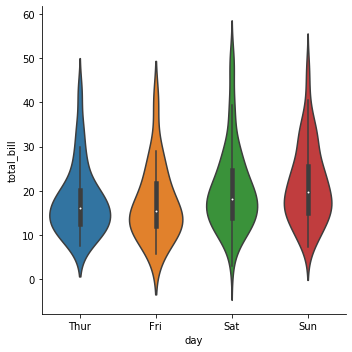

In [20]:
# General method for plotting
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin') # bar violin

In [21]:
# Matrix plots

In [6]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [23]:
# Heat map
tc=tips.corr() # Correlation data Matrix form

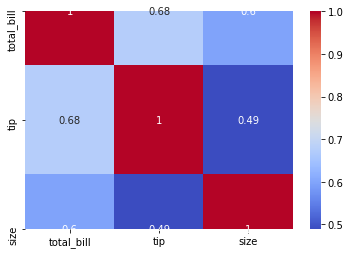

In [24]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [25]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

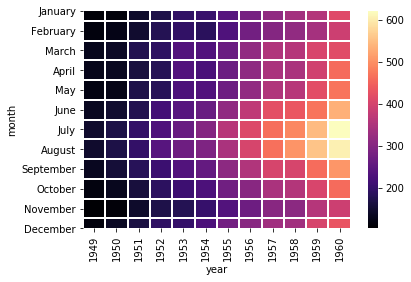

In [26]:
sns.heatmap(fp,cmap='magma',linewidths=1,linecolor='white')

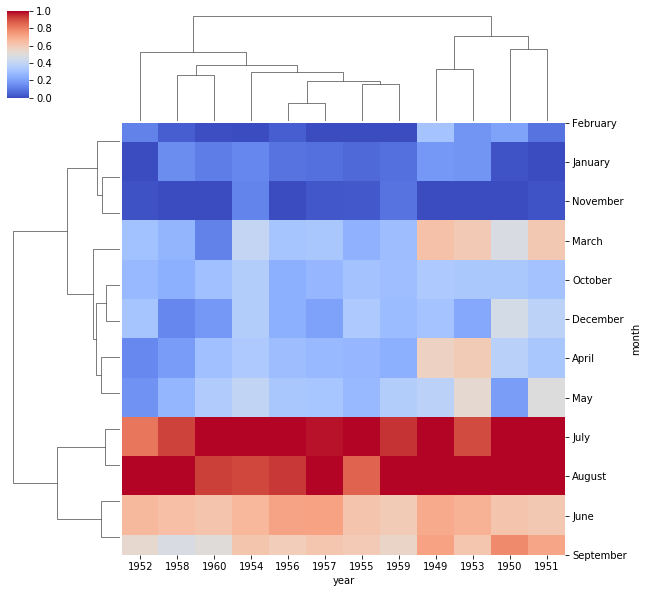

In [27]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [4]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

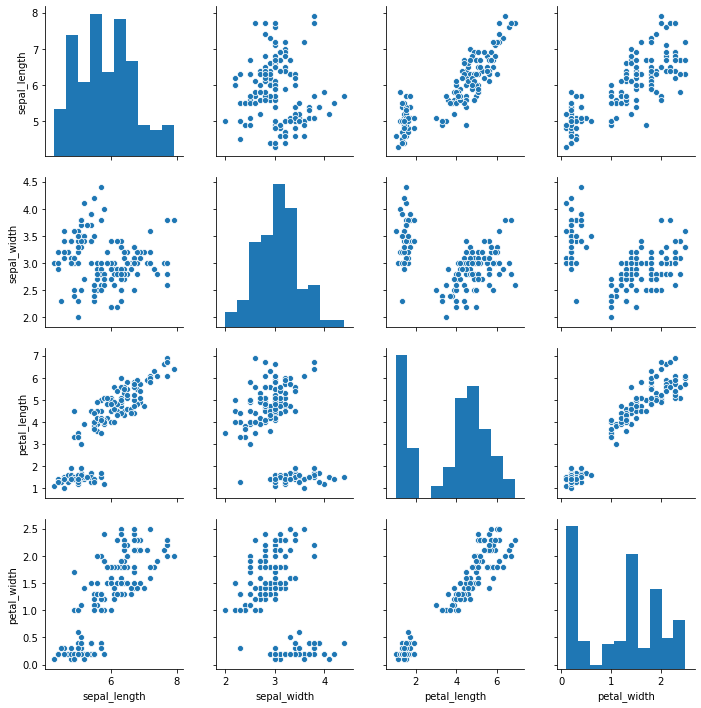

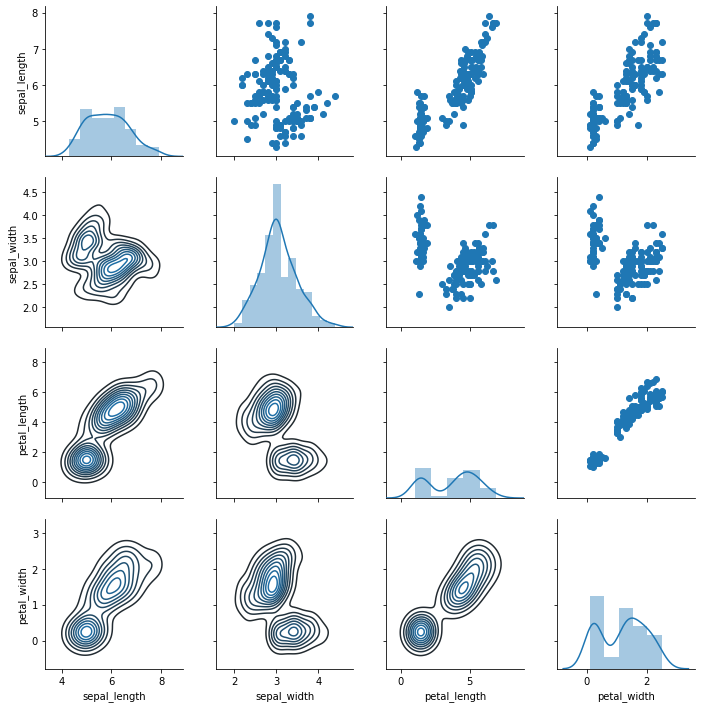

In [34]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


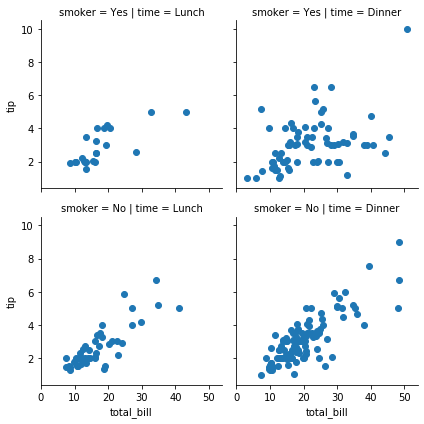

In [41]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
#g.map(sns.distplot,'total_bill')
g.map(plt.scatter,'total_bill','tip')

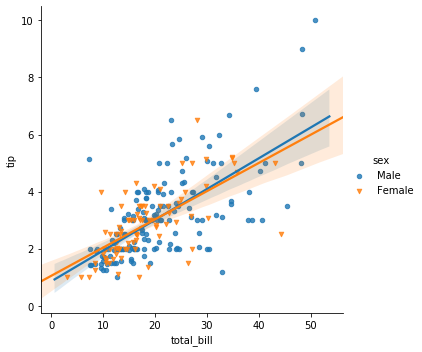

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':20}) # Size of scatter plot

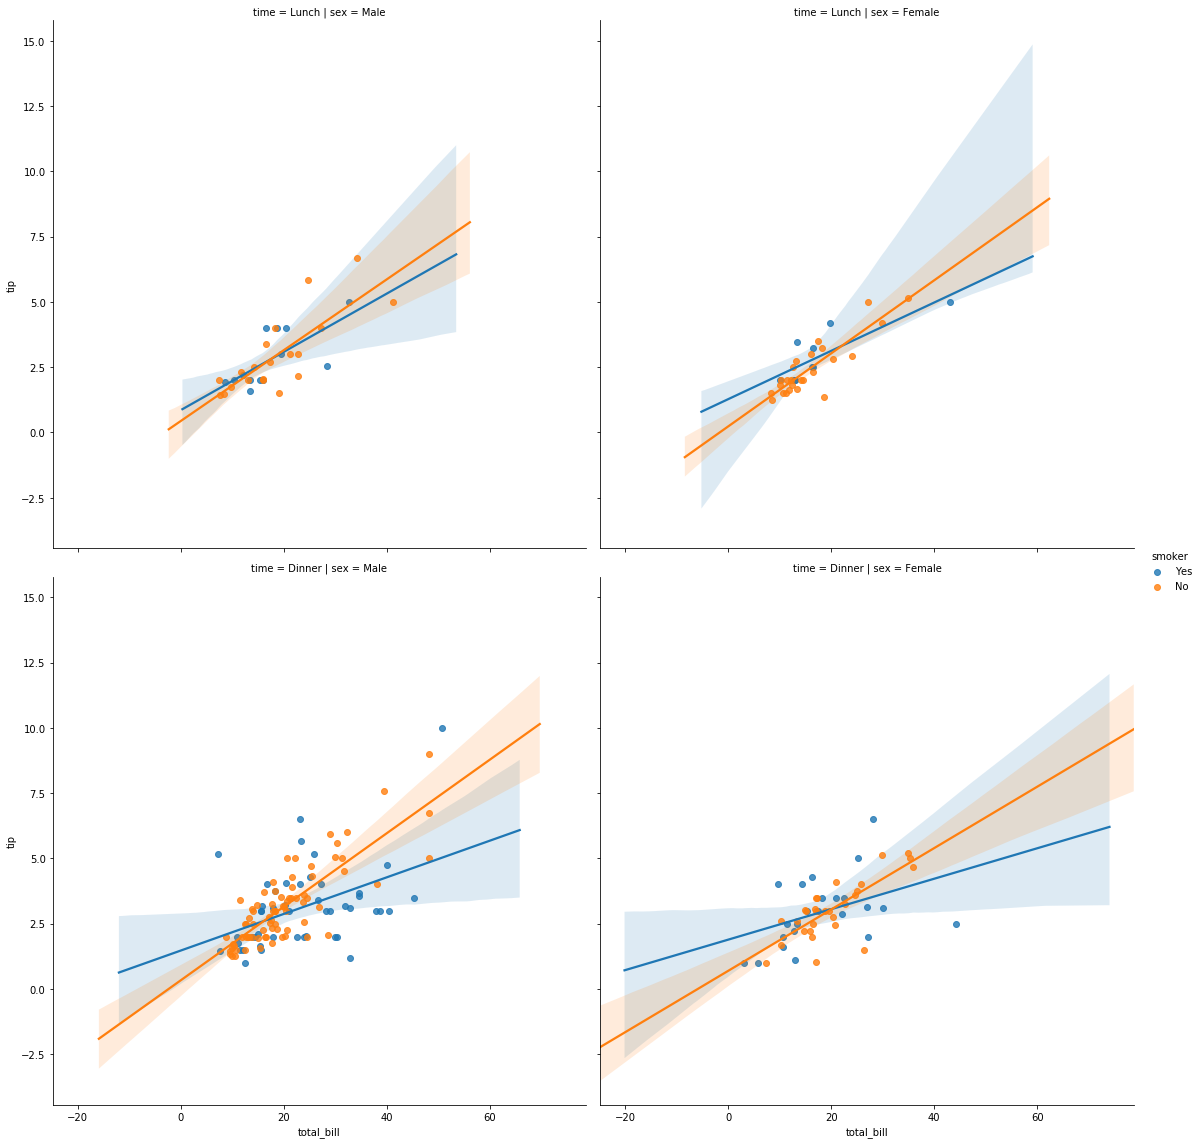

In [19]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='smoker',
          aspect=1,size=8)

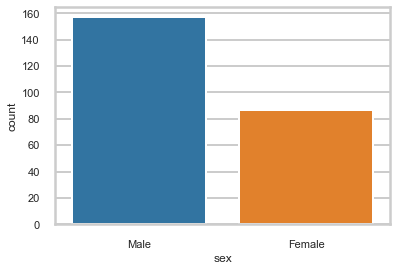

In [15]:
#sns.set_style('whitegrid') # ticks
#plt.figure(figsize=(12,3))
sns.set_context('poster',font_scale=0.5)
sns.countplot(x='sex',data=tips)
#sns.despine(left=True,bottom=True)

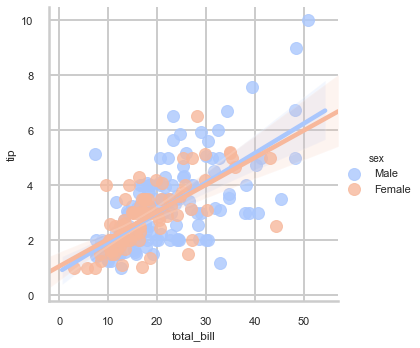

In [17]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')